In [5]:
import numpy as np
import pandas as pd

import seaborn as sns; sns.set()  # for plot styling
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster import hierarchy 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.metrics import silhouette_score,calinski_harabasz_score,classification_report,confusion_matrix

from scipy.spatial.distance import pdist,squareform
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy import stats



# Data Exploration : Wine Data
***

## 1. Data Loading and Initial Exploration

In [13]:
url='https://storage.googleapis.com/the_public_bucket/wine-clustering.csv'
df_wine=pd.read_csv(url)

In [14]:
df_wine.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [15]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


#### The dataset contains 178 records and has **no missing values**. It consists of 13 numeric columns corresponding to physical and chemical properties of wines.

In [16]:
df_wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### To obtain an overview of the distribution and dispersion of the data, the describe function was used, which provides a statistical summary of the columns. According to the results, it is determined that there are no outliers or erroneous values in the data.To complement this information, histograms for all variables were generated.

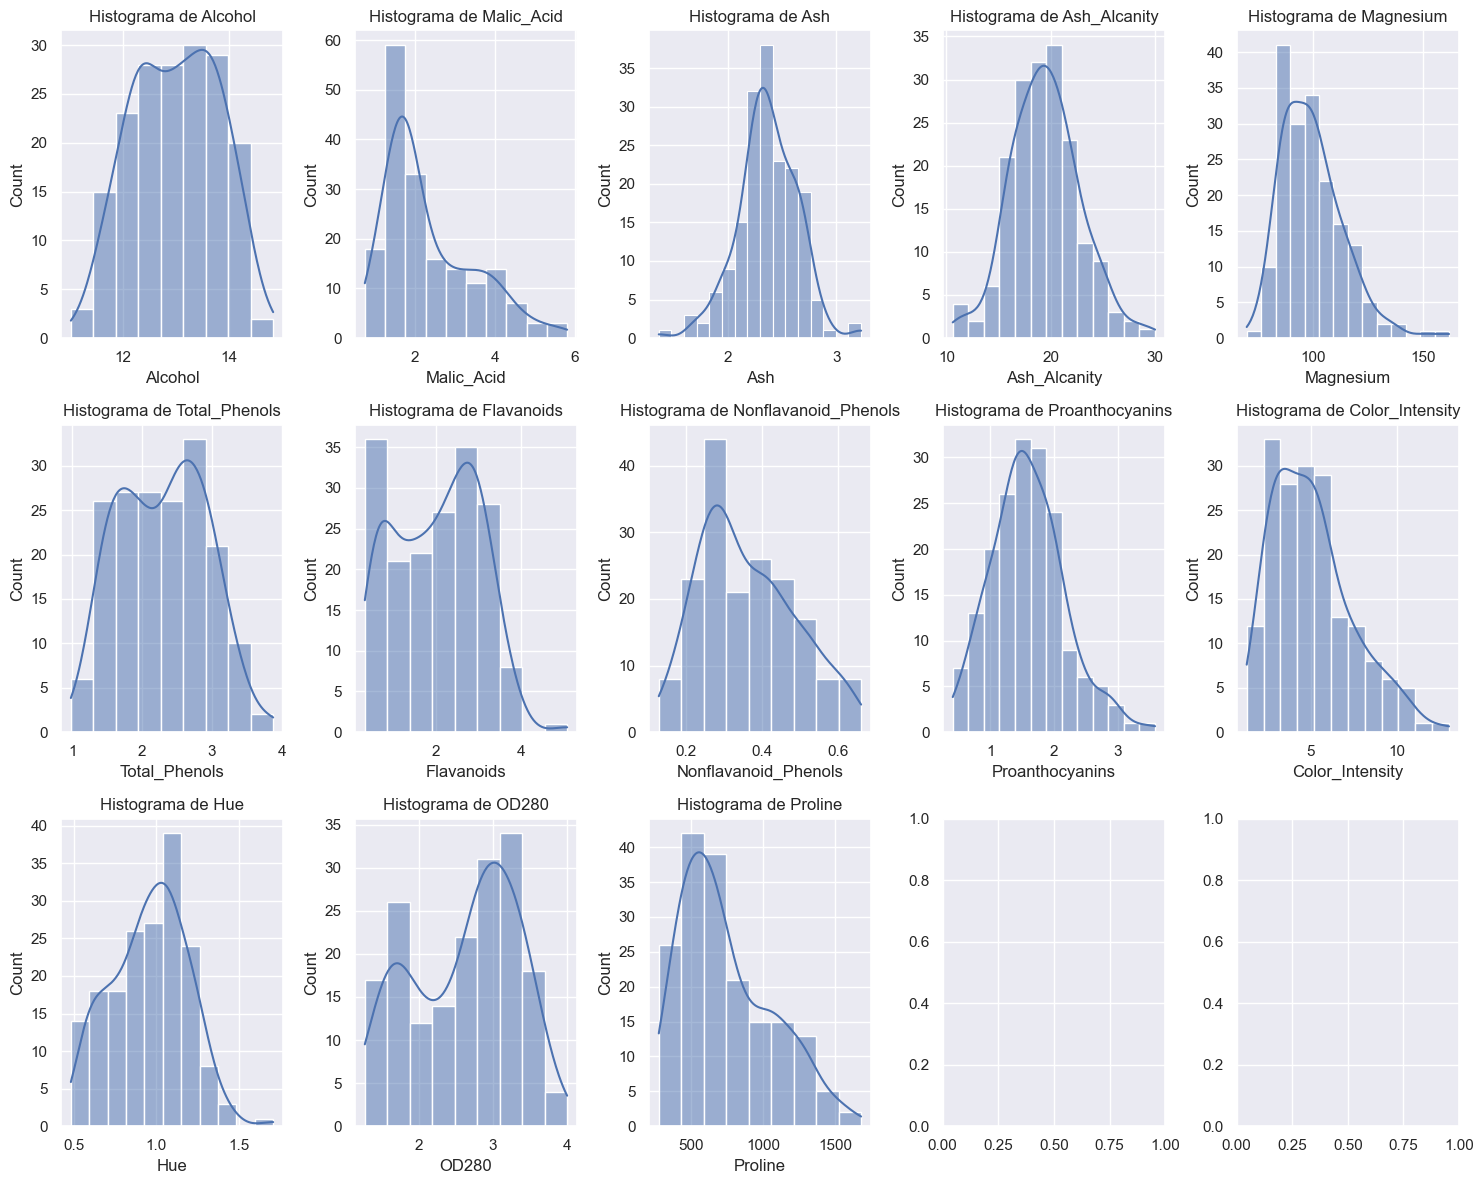

In [17]:

columnas_por_fila = 5
num_filas = (len(df_wine.columns) // columnas_por_fila) + (len(df_wine.columns) % columnas_por_fila > 0)

# Configuración de los subplots
fig, axs = plt.subplots(num_filas, columnas_por_fila, figsize=(15, 4 * num_filas))
axs = axs.flatten()

# Visualización mediante histogramas 
for i, column in enumerate(df_wine.columns):
    # Histograma
    sns.histplot(df_wine[column], kde=True, ax=axs[i])
    axs[i].set_title(f'Histograma de {column}')

plt.tight_layout()
plt.show()


#### The Shapiro-Wilk test was applied to determine if the variables followed a normal distribution.

In [23]:
for column in df_wine.columns:
    _, p_valor = shapiro(df_wine[column])

    # condition significancy level 0.05
    if p_valor < 0.05:
        print(f' {column} not normal.\n')
    else:
        print(f'{column}  normal.\n')

 Alcohol not normal.

 Malic_Acid not normal.

 Ash not normal.

Ash_Alcanity  normal.

 Magnesium not normal.

 Total_Phenols not normal.

 Flavanoids not normal.

 Nonflavanoid_Phenols not normal.

 Proanthocyanins not normal.

 Color_Intensity not normal.

 Hue not normal.

 OD280 not normal.

 Proline not normal.



## 2.Correlation Heatmap of Variables

To study the correlation between the characteristics, two correlation coefficients were evaluated:

* Pearson coefficient, which is the most common, assumes that the features follow a normal distribution. In this case, many of the characteristics do not have a strictly normal distribution. However, there is a sufficient amount of data to give robustness to this coefficient, and it could be used.

* Spearman coefficient, which does not assume normality of the features or the presence of a linear relationship between them. 

Although both could be applied, I will use the Spearman coefficient since we know a priori that some characteristics deviate from the normal distribution.

p-value was considered to identify significant correlations


Using the following functions, a heatmap of the correlation matrix is generated in which only the coefficients that are significant considering an alpha of 0.01 are visualized.

In [28]:
def corr_sig_spearman(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.spearmanr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

In [26]:
def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})

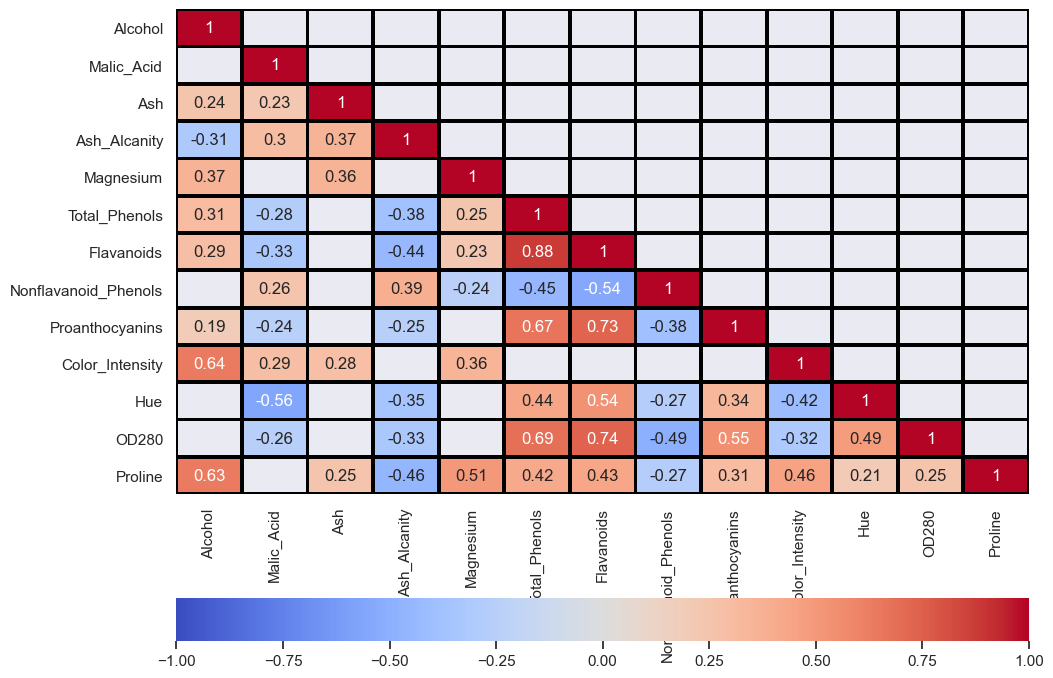

In [27]:
from scipy import stats
# Plotting with significance filter
corr = df_wine.corr('spearman')                            # get correlation
p_values = corr_sig_spearman(df_wine)                     # get p-Value
mask = np.invert(np.tril(p_values<0.01))    # mask - only get significant corr
plot_cor_matrix(corr,mask)  

 
### The following correlations are observed:
> ####  The content of Alcohol and Proline are positively correlated. As the alcohol content in a wine increases, the Proline content also increases.
> #### The hue is negatively correlated with malic acid and positively correlated with flavonoids. Wines with lower values of malic acid and higher values of flavonoids exhibit higher hues.
> #### Total_phenols is strongly correlated with Flavanoids and Proanthocyanins, which is expected since Flavanoids and Proanthocyanins are included in the total_phenols category.
> #### The color intensity is positively correlated with the alcohol content of the wine. There is also a negative correlation between the color intensity of the wine and its hue. Wines with more intense colors have lower hue.
> #### The OD280 is strongly correlated with flavonoid phenolic compounds. Also Wines with higher hues have a higher OD280 coefficient.
